___
# Ciência dos Dados - PROJETO 1

    LEONARDO IMAKUMA NEVES


##  É possível suprir a fome da população brasileira apenas reorganizando a distribuição de doaçãoes alimentares que já ocorrem no brasil ?

___
## Introdução

Descreva aqui o que pretende analisar!

Capriche no português!! 
Se quiser pode utilizar pesquisas semelhantes publicadas em sites confiáveis!!


___
## Análise e Resultados

In [371]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [372]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Leonardo\Documents\insper\ciencia dos dados


In [373]:
#Se usar o arquivo descompactado
#pd.read_csv('DOM2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [374]:
dados= pd.read_csv('DOM2009.csv',sep=',')

In [375]:
dadosID = dados.loc[: ,["UF","V0203","V0207","V0229","V2136","V2103","V2107","V2109","V2119","V4621"]]

In [376]:
dadosCompletos=dadosID.dropna()


In [377]:
dadosCompletos.V0203 = dadosCompletos.V0203.astype("category")
dadosCompletos.V0203.cat.categories = (['Alvenaria','Madeira aparelhada','Taipa não revestida','Madeira aproveitada','Palha','Outro material'])
dadosCompletos.V2119 = dadosCompletos.V2119.astype("category")
dadosCompletos.V2119.cat.categories = (['Emagreceu','Não emagreceu'])
dadosCompletos.V2103 = dadosCompletos.V2103.astype("category")
dadosCompletos.V2103.cat.categories = (['Sim','Não'])
dadosCompletos.V2107 = dadosCompletos.V2107.astype("category")
dadosCompletos.V2107.cat.categories = (['Sim','Não'])
dadosCompletos.V2136 = dadosCompletos.V2136.astype("category")
dadosCompletos.V2136.cat.categories = (['Recebeu alimentos','Não recebeu'])
dadosCompletos.V0203 = dadosCompletos.V0203.astype("category")
dadosCompletos.head()

C:\Users\Leonardo\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,UF,V0203,V0207,V0229,V2136,V2103,V2107,V2109,V2119,V4621
2,11,Madeira aproveitada,1.0,1.0,Recebeu alimentos,Sim,Sim,1.0,Emagreceu,118.0
8,11,Madeira aparelhada,3.0,3.0,Não recebeu,Sim,Sim,1.0,Emagreceu,59.0
9,11,Alvenaria,1.0,3.0,Não recebeu,Sim,Não,3.0,Não emagreceu,6512.0
10,11,Madeira aparelhada,3.0,3.0,Recebeu alimentos,Sim,Sim,1.0,Não emagreceu,87.0
14,11,Alvenaria,1.0,3.0,Recebeu alimentos,Sim,Não,3.0,Não emagreceu,500.0


In [406]:
recebeuComida=dadosCompletos.loc[(dadosCompletos['V2136'] =='Recebeu alimentos' ) ]
naoRecebeuComida=dadosCompletos.loc[(dadosCompletos['V2136'] =='Não recebeu' ) ]
dadosNaoMagros=dadosCompletos.loc[(dadosCompletos['V2119'] =='Não emagreceu' ) ]
dadosMagros=dadosCompletos.loc[(dadosCompletos['V2119'] =='Emagreceu' ) ]
dadosMagrosRecebe=dadosMagros.loc[(dadosMagros['V2136'] =='Recebeu alimentos') ]
dadosMagrosNaoRecebe=dadosMagros.loc[(dadosMagros['V2136'] =='Não recebeu') ]
dadosNaoMagrosRecebe=dadosNaoMagros.loc[(dadosNaoMagros['V2136'] =='Recebeu alimentos') ]


In [379]:
RENDA_cat = pd.cut(dadosMagros.V4621, bins=10)

In [380]:
RENDA_cat.describe()

count                                5598
unique                                  2
top       (-999999999.999, 99999999999.9]
freq                                 5517
Name: V4621, dtype: object

In [381]:
faixa = range(10,3000,50)
RENDA_cat = pd.cut(dadosMagros.V4621, bins=faixa)
RENDA_cat.value_counts(sort=False, normalize=True)*100

(10, 60]        12.549839
(60, 110]       16.764762
(110, 160]      16.555914
(160, 210]      11.353712
(210, 260]      10.879058
(260, 310]       7.081830
(310, 360]       4.423771
(360, 410]       3.284602
(410, 460]       2.430226
(460, 510]       6.683121
(510, 560]       1.461933
(560, 610]       1.329030
(610, 660]       0.797418
(660, 710]       0.892349
(710, 760]       0.550598
(760, 810]       0.474654
(810, 860]       0.303778
(860, 910]       0.170875
(910, 960]       0.550598
(960, 1010]      0.360737
(1010, 1060]     0.037972
(1060, 1110]     0.094931
(1110, 1160]     0.037972
(1160, 1210]     0.151889
(1210, 1260]     0.056958
(1260, 1310]     0.075945
(1310, 1360]     0.113917
(1360, 1410]     0.037972
(1410, 1460]     0.037972
(1460, 1510]     0.075945
(1510, 1560]     0.018986
(1560, 1610]     0.075945
(1610, 1660]     0.000000
(1660, 1710]     0.018986
(1710, 1760]     0.018986
(1760, 1810]     0.000000
(1810, 1860]     0.000000
(1860, 1910]     0.000000
(1910, 1960]

In [384]:
dadosCompletos.to_csv("dadosAlimentar")

In [385]:
dadosCompletos.columns

Index(['UF', 'V0203', 'V0207', 'V0229', 'V2136', 'V2103', 'V2107', 'V2109',
       'V2119', 'V4621'],
      dtype='object')

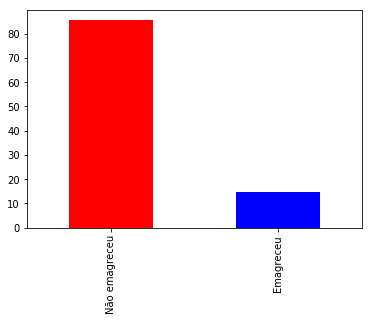

In [386]:
Emagreceu = dadosCompletos.V2119.value_counts(normalize = True)*100
Emagreceu.plot(kind='bar', color=('red', 'blue','green'), legend=False)

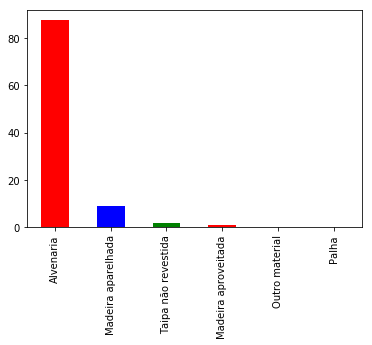

In [387]:
CasaTipo = dadosCompletos.V0203.value_counts(normalize = True)*100
CasaTipo.plot(kind='bar', color=('red', 'blue','green'), legend=False)

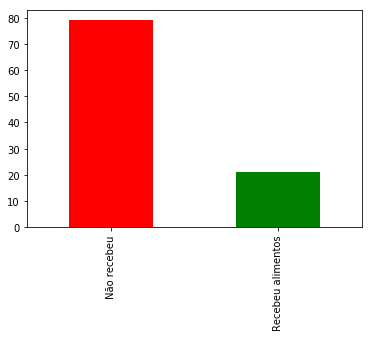

In [388]:
RecebeuComida = dadosCompletos.V2136.value_counts(normalize = True)*100
RecebeuComida.plot(kind='bar', color=('red', 'green','blue'), legend=False)

In [389]:
def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)
cruzamento = pd.crosstab([dadosCompletos.V2136,dadosCompletos.V2119],dadosCompletos.V0203)*0.002608242
cruzamento

V0203                            Alvenaria  Madeira aparelhada  \
V2136             V2119                                          
Recebeu alimentos Emagreceu       4.968701            0.769431   
                  Não emagreceu  12.884715            1.322379   
Não recebeu       Emagreceu       6.872718            0.996348   
                  Não emagreceu  62.746478            6.071987   

V0203                            Taipa não revestida  Madeira aproveitada  \
V2136             V2119                                                     
Recebeu alimentos Emagreceu                 0.234742             0.195618   
                  Não emagreceu             0.286907             0.198226   
Não recebeu       Emagreceu                 0.305164             0.182577   
                  Não emagreceu             1.077204             0.539906   

V0203                               Palha  Outro material  
V2136             V2119                                    
Recebeu alimentos Emagreceu      0.000000        0.015649  
                  Não emagreceu  0.013041        0.036515  
Não recebeu       Emagreceu      0.023474        0.036515  
                  Não emagreceu  0.041732        0.179969

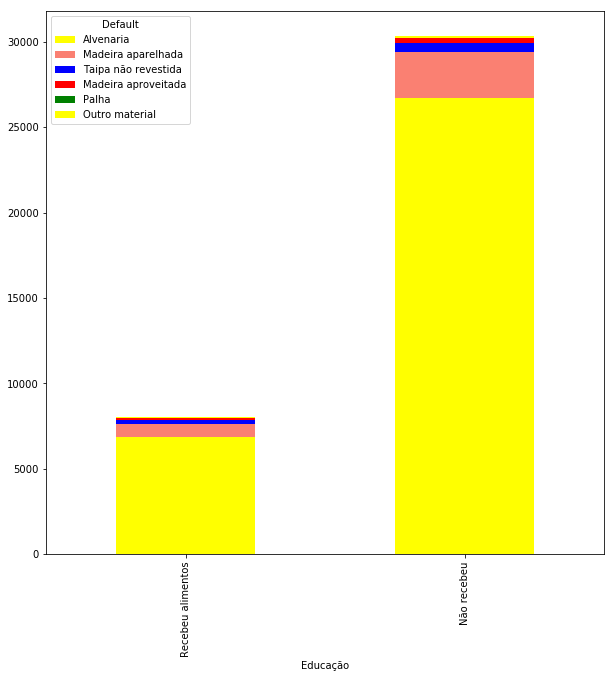

In [390]:

ct5 = pd.crosstab(dadosCompletos.V2136,dadosCompletos.V0203,rownames=['Educação'], colnames=['Default'])
ct5.plot.bar(color=('yellow', 'salmon', 'blue', 'red', 'green'), stacked=True, figsize = (10,10))

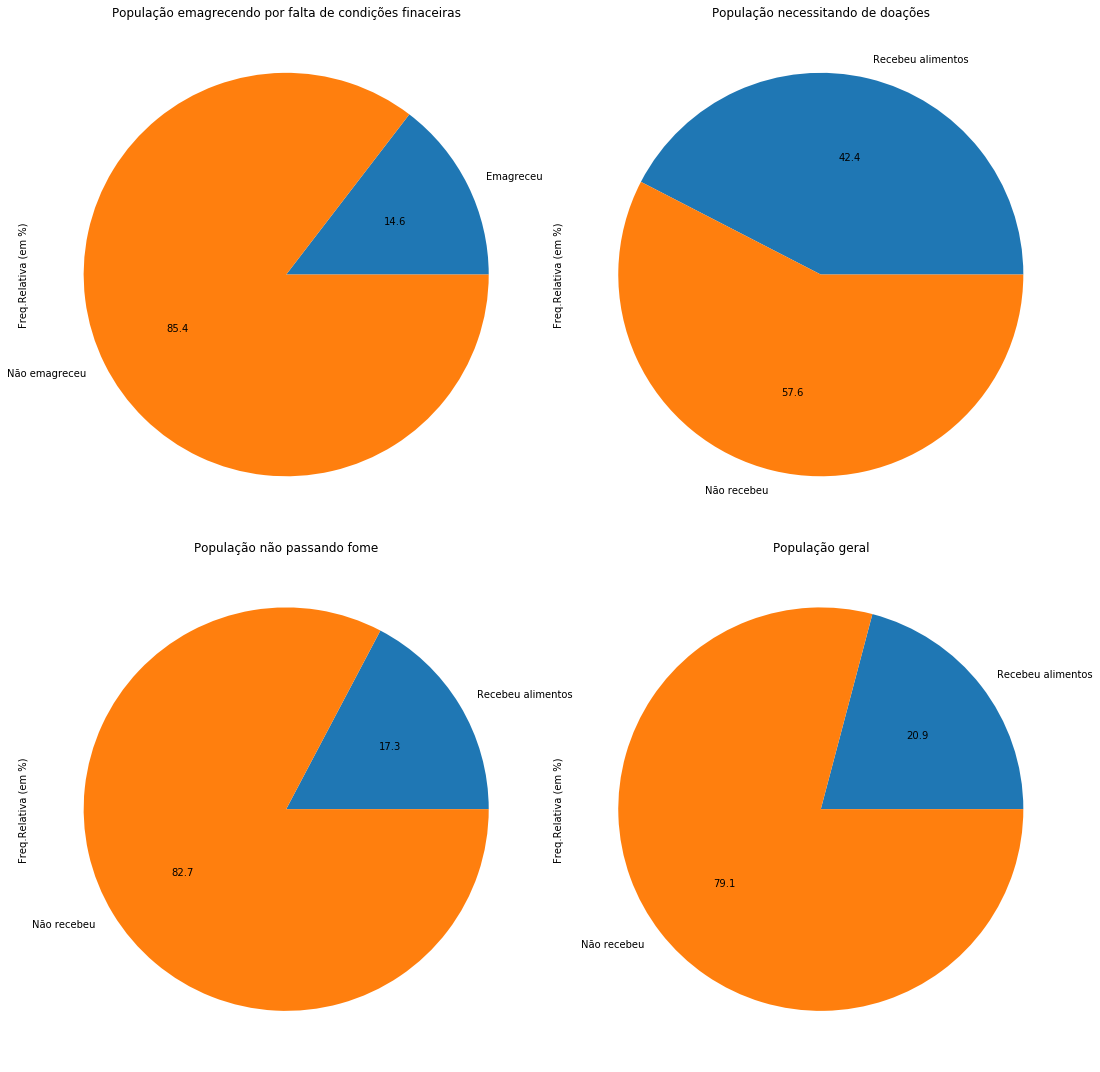

In [398]:
fig = plt.figure(figsize=(15, 15))

fomeMagro = (dadosCompletos.V2119.value_counts(sort=False, normalize=True)*100)#.round(decimals=1)
plt.subplot(221)
plot = fomeMagro.plot(kind='pie',title='População emagrecendo por falta de condições finaceiras',autopct='%.1f')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('')



fome = (dadosMagros.V2136.value_counts(sort=False, normalize=True)*100).round(decimals=1)

plt.subplot(222)
plot = fome.plot(kind='pie',title='População necessitando de doações',autopct='%.1f')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('')
###########################################################################################################################
semfome = (dadosNaoMagros.V2136.value_counts(sort=False, normalize=True)*100).round(decimals=1)

plt.subplot(223)
plot = semfome.plot(kind='pie',title='População não passando fome',autopct='%.1f')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('')
###########################################################################################################################
recebendo = (dadosCompletos.V2136.value_counts(sort=False, normalize=True)*100).round(decimals=1)

plt.subplot(224)
plot = recebendo.plot(kind='pie',title='População geral',autopct='%.1f')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('')


plt.tight_layout()
plt.show()

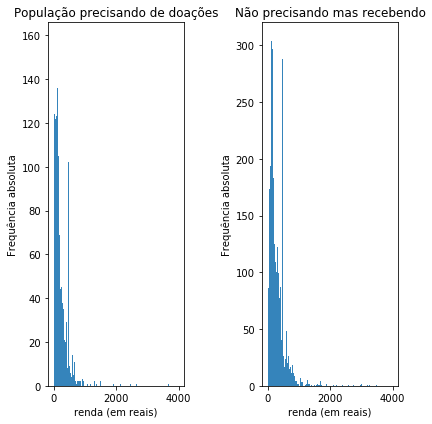

In [412]:
faixa = range(10,4000,15)
RENDA_cat = pd.cut(dadosMagros.V4621, bins=faixa)
RENDA_cat.value_counts(sort=False, normalize=True)*100
plt.subplot(121)
plot = dadosMagrosRecebe.V4621.plot.hist(bins=faixa,title='População precisando de doações', figsize=(6, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')
#########################################
plt.subplot(122)
plot = dadosNaoMagrosRecebe.V4621.plot.hist(bins=faixa,title='Não precisando mas recebendo', figsize=(6, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')

plt.tight_layout()

plt.show()

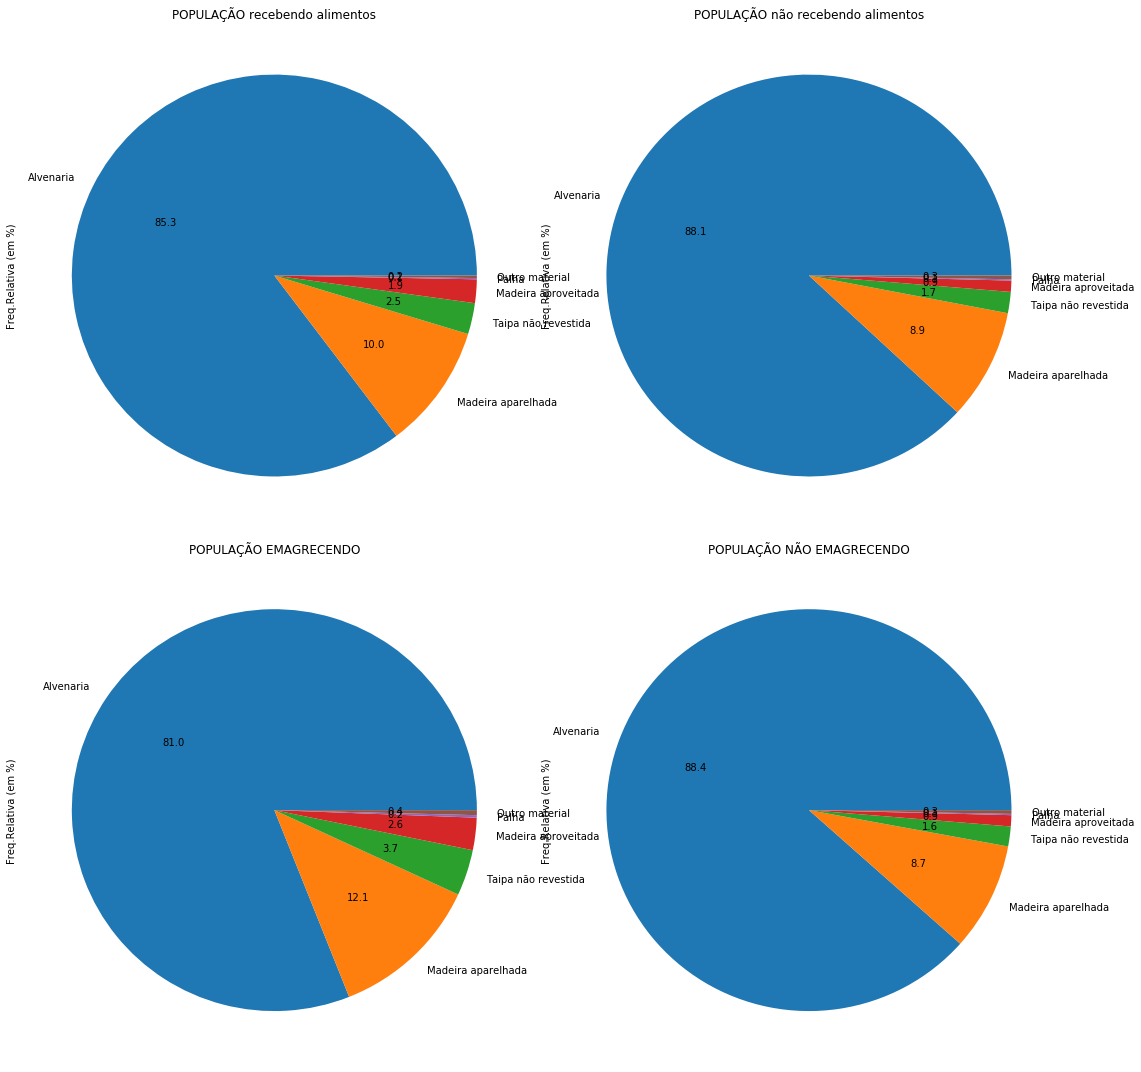

In [393]:
fig = plt.figure(figsize=(15, 15))
recebeu = (recebeuComida.V0203.value_counts(sort=False, normalize=True)*100).round(decimals=1)

plt.subplot(221)
plot = recebeu.plot(kind='pie',title='POPULAÇÃO recebendo alimentos',autopct='%.1f')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('')
##########################################
recebeu2 = (naoRecebeuComida.V0203.value_counts(sort=False, normalize=True)*100).round(decimals=1)

plt.subplot(222)
plot = recebeu2.plot(kind='pie',title='POPULAÇÃO não recebendo alimentos',autopct='%.1f')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('')
##########################################
recebeu3 = (dadosMagros.V0203.value_counts(sort=False, normalize=True)*100).round(decimals=1)

plt.subplot(223)
plot = recebeu3.plot(kind='pie',title='POPULAÇÃO EMAGRECENDO',autopct='%.1f')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('')
##########################################
recebeu4 = (dadosNaoMagros.V0203.value_counts(sort=False, normalize=True)*100).round(decimals=1)

plt.subplot(224)
plot = recebeu4.plot(kind='pie',title='POPULAÇÃO NÃO EMAGRECENDO',autopct='%.1f')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('')



plt.tight_layout()
plt.show()

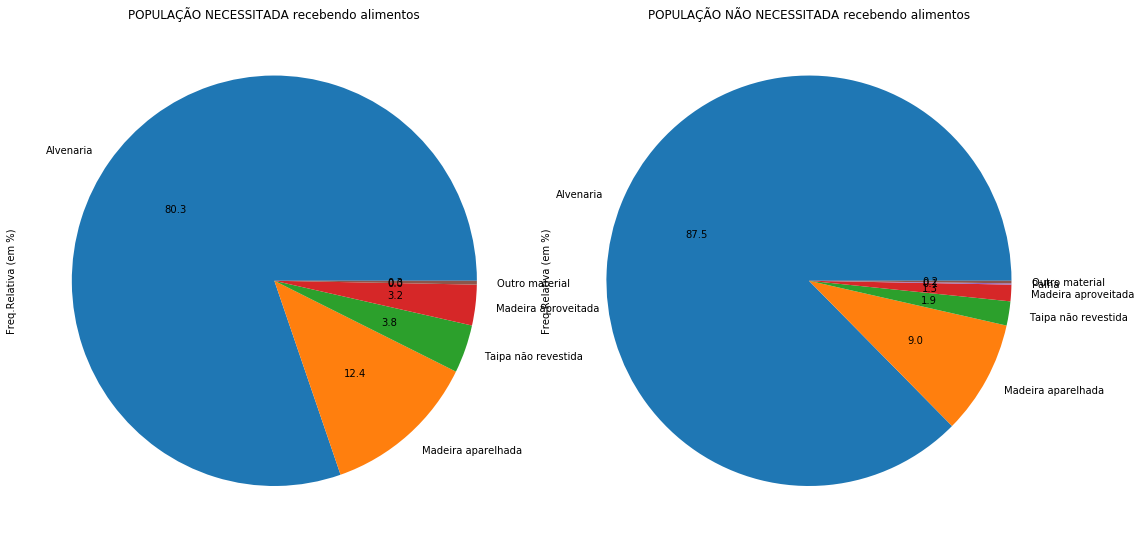

In [394]:
fig = plt.figure(figsize=(15, 15))
recebeu = (dadosMagrosRecebe.V0203.value_counts(sort=False, normalize=True)*100).round(decimals=1)

plt.subplot(221)
plot = recebeu.plot(kind='pie',title='POPULAÇÃO NECESSITADA recebendo alimentos',autopct='%.1f')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('')
##########################################
recebeu2 = (dadosNaoMagrosRecebe.V0203.value_counts(sort=False, normalize=True)*100).round(decimals=1)

plt.subplot(222)
plot = recebeu2.plot(kind='pie',title='POPULAÇÃO NÃO NECESSITADA recebendo alimentos',autopct='%.1f')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('')

plt.tight_layout()
plt.show()

___
## Conclusão 

Descreva aqui suas conclusões!